In [1]:
#versao2.py
#Imprime versao de Tensorflow, Keras e Keras dentro do Tensorflow
#Tambem imprime se GPU esta funcionando, versao de SO, CPU e RAM
import tensorflow as tf
import keras
import sys
import cv2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
print(sys.version)
print("Versao de tensorflow:",tf.__version__)
print("Versao de Keras independente:",keras.__version__)
print("Versao de Keras dentro de tensorflow:",tf.keras.__version__)
print("Versao cv2:",cv2.__version__)
print()

gpu=tf.test.gpu_device_name()
if gpu=="":
  print("Computador sem GPU.")
else:
  print("Computador com GPU:",tf.test.gpu_device_name())
  from tensorflow.python.client import device_lib
  devices=device_lib.list_local_devices()
  print("Dispositivos:",[x.physical_device_desc for x in devices if x.physical_device_desc!=""])
print()

!lsb_release -a | grep "Description" #imprime qual é o sistema operacional
!echo

!cat /proc/cpuinfo | grep -E "model name|core" #especificações de CPU
!echo 

!cat /proc/meminfo  | grep "Mem" #especificações de RAM


3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
Versao de tensorflow: 2.3.0
Versao de Keras independente: 2.4.3
Versao de Keras dentro de tensorflow: 2.4.0
Versao cv2: 4.1.2

Computador com GPU: /device:GPU:0
Dispositivos: ['device: XLA_CPU device', 'device: XLA_GPU device', 'device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5']

No LSB modules are available.
Description:	Ubuntu 18.04.5 LTS

model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
core id		: 0
cpu cores	: 1
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
core id		: 0
cpu cores	: 1

MemTotal:       13333536 kB
MemFree:         9515912 kB
MemAvailable:   11934000 kB


In [3]:
%reset -f
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd '/content/drive/My Drive/EP Hae'


Mounted at /content/drive
/content/drive/My Drive/EP Hae


In [4]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


qx = []
qy = []
for i in range(151,201):
  nome=str(i)
  img = cv2.imread('imagens/'+nome+'bl.jpg',0)
  qx.append(img/256)
  bgr = cv2.imread('imagens/'+nome+'bc.jpg')
  lab=cv2.cvtColor(np.array(bgr, dtype=np.uint8),cv2.COLOR_BGR2LAB)
  laba=(lab[:,:,1]-42)/184
  labb=(lab[:,:,2]-20)/203
  lab = np.dstack((laba,labb))
  qy.append((lab))


  img = cv2.imread('imagens/'+nome+'al.jpg',0)
  qx.append(img/256)
  bgr = cv2.imread('imagens/'+nome+'ac.jpg')
  lab=cv2.cvtColor(np.array(bgr, dtype=np.uint8),cv2.COLOR_BGR2LAB)
  laba=(lab[:,:,1]-42)/184
  labb=(lab[:,:,2]-20)/203
  lab = np.dstack((laba,labb))
  qy.append((lab))


qx = np.array(qx).reshape(100, 384, 256, 1) 
qy = np.array(qy).reshape(100, 384, 256, 2)

In [6]:
from sklearn.metrics import mean_squared_error
from tensorflow import keras


model0 = keras.models.load_model('psi3472.h5')
model1 = keras.models.load_model('psi3472_1.h5')
model2 = keras.models.load_model('psi3472_2.h5')
model3 = keras.models.load_model('psi3472_3.h5')
model4 = keras.models.load_model('psi3472_4.h5')
model5 = keras.models.load_model('psi3472_5.h5')


qy0 = model0.predict(qx)
qy1 = model1.predict(qx)
qy2 = model2.predict(qx)
qy3 = model3.predict(qx)
qy4 = model4.predict(qx)
qy5 = model5.predict(qx)

qypredict = (qy0+qy1+qy2+qy3+qy4+qy5)/6
eval = np.square(np.subtract(qy,qypredict)).mean()

print("mean squared error for test: " + str(eval))


mean squared error for test: 0.0003585462642466744


In [13]:
imgs_true = []
imgs_colorless = []
imgs_predict = []
for i in (range(50)):
  bgr = cv2.imread('imagens/'+ str(i+151)+ 'bc.jpg')
  imgs_true.append(bgr)

  less = cv2.imread('imagens/'+ str(i+151)+ 'bl.jpg')
  imgs_colorless.append(less)

  laba=(qypredict[2*i,:,:,0])*184+42
  labb=(qypredict[2*i,:,:,1])*203+20

  b = qx[2*i]*255
  d = np.dstack((b,laba,labb))
  img = np.array(d, dtype=np.uint8)

  e = cv2.cvtColor(img,cv2.COLOR_LAB2BGR)
  imgs_predict.append(e)
  cv2.imwrite('Imagens_coloridas_pela_rede/' + str(i+151) + 'b.jpg', e)



  bgr = cv2.imread('imagens/'+ str(i+151)+ 'ac.jpg')
  imgs_true.append(bgr)

  less = cv2.imread('imagens/'+ str(i+151)+ 'al.jpg')
  imgs_colorless.append(less)

  laba=(qypredict[2*i+1,:,:,0])*184+42
  labb=(qypredict[2*i+1,:,:,1])*203+20

  b = qx[2*i+1]*255
  d = np.dstack((b,laba,labb))
  img = np.array(d, dtype=np.uint8)

  e = cv2.cvtColor(img,cv2.COLOR_LAB2BGR)
  imgs_predict.append(e)
  cv2.imwrite('Imagens_coloridas_pela_rede/' + str(i+151) + 'a.jpg', e)



Imagem real: 


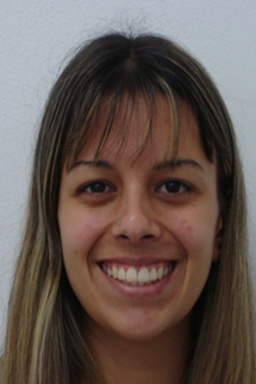


 Imagem sem cor: 


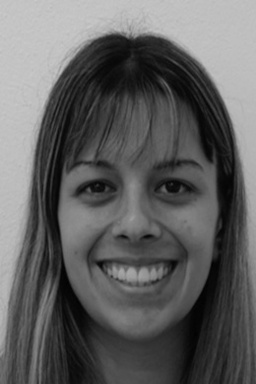


 Imagem colorida pela rede: 


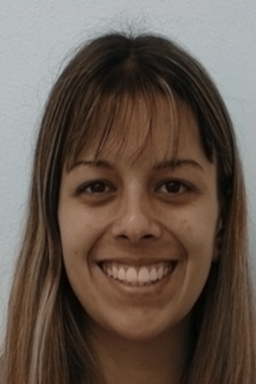

In [14]:
# Qualquer n de 0 a 99
def printIMG(n):
  print("Imagem real: ")
  cv2_imshow(imgs_true[n])

  print("\n Imagem sem cor: ")
  cv2_imshow(imgs_colorless[n])

  print("\n Imagem colorida pela rede: ")
  cv2_imshow(imgs_predict[n])

printIMG(10)